In [2]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

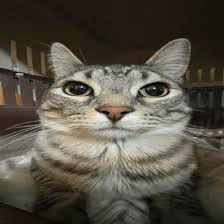

In [3]:
resnet50 = ResNet50()
img = load_img('download.jpg', target_size=(224,224)) # here we have to download image from internet
img

In [4]:
img = img_to_array(img)
img = img.reshape(1, 224,224,3)

In [5]:
img.shape

(1, 224, 224, 3)

In [6]:
img = preprocess_input(img)
pred = resnet50.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [7]:
pred;
decode_predictions(pred)

[[('n02123045', 'tabby', np.float32(0.6409868)),
  ('n02123159', 'tiger_cat', np.float32(0.10964141)),
  ('n02124075', 'Egyptian_cat', np.float32(0.091088556)),
  ('n02123394', 'Persian_cat', np.float32(0.054145277)),
  ('n02127052', 'lynx', np.float32(0.018967556))]]

In [8]:
from keras.utils import plot_model
plot_model(resnet50, show_layer_names=True, show_trainable=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [9]:
resnet50.trainable

True

In [10]:
labels = ['airplane','automobile','bird','cat','deer','dog',
 'frog','horse','ship','truck']
resnet50 = ResNet50(include_top=False, input_shape=(32, 32, 3))
from keras.layers import Flatten, Dense

In [11]:
#Flatten output layer of Resnet
flattened = Flatten()(resnet50.output)
#Fully connected layer 1
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)
#Fully connected layer, output layer
fc2 = Dense(10, activation='softmax', name="AddedDense2")(fc1)
resnet50.trainable = False
from keras.models import Model
model = Model(inputs=resnet50.inputs, outputs=fc2)
plot_model(model, show_layer_activations=True, show_trainable=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 309s 184ms/step - accuracy: 0.5498 - loss: 1.2992
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 285s 183ms/step - accuracy: 0.6213 - loss: 1.0725


In [14]:
flattened = Flatten()(resnet50.output)
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)
fc2 = Dense(64, activation='relu', name="AddedDense2")(fc1)
fc3 = Dense(10, activation='softmax', name="AddedDense3")(fc2)

In [15]:
resnet50.trainable = False
model = Model(inputs=resnet50.inputs, outputs=fc3)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 307s 185ms/step - accuracy: 0.5411 - loss: 1.3107
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 319s 183ms/step - accuracy: 0.6180 - loss: 1.0845
